<a href="https://colab.research.google.com/github/pham156/pytorch-learning/blob/main/Pytorch_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})

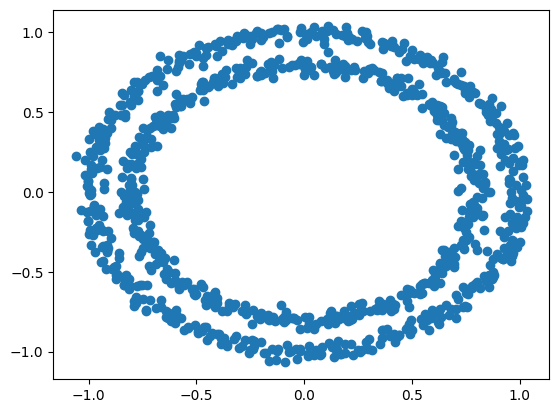

In [6]:
plt.scatter(x = X[:, 0], y = X[:, 1])

In [8]:
# Check input and output
X.shape, y.shape
X.dtype
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42) # 20% test

In [14]:
# subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # first layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # second layer

  def forward(self, x):
    return self.layer_2(self.layer_1(x))
model_0 = CircleModelV0()


In [15]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Use nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5147, -0.5327],
                      [-0.2764, -0.4788],
                      [-0.4771,  0.3496],
                      [-0.2291, -0.6406],
                      [-0.1374, -0.3295]])),
             ('0.bias', tensor([ 0.2001,  0.4778,  0.2844,  0.2197, -0.4169])),
             ('1.weight',
              tensor([[-0.0771,  0.0924, -0.1597,  0.3006,  0.1396]])),
             ('1.bias', tensor([0.2493]))])

In [19]:
with torch.inference_mode():
  untrained_preds = model_0(X_test)

In [25]:
loss_fn = nn.BCEWithLogitsLoss() # cross entropy with sigmoid activation (use for binary classification)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [31]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [22]:
with torch.inference_mode():
  y_logit = model_0(X_test)[:5]

In [23]:
y_pred_probs = torch.sigmoid(y_logit)

In [28]:
# Building loop
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
  model_0.train()
  # Forward
  y_logits = model_0(X_train).squeeze() # output of model
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Loss function
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss backward
  loss.backward()
  # Optimizer step
  optimizer.step()
  model_0.eval()

  # Testing
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc:.2f}% | Test Loss: {test_loss} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.7067019939422607 | Acc: 59.125000% | Test Loss: 0.6968825459480286 | Test Acc: 62.000000%
Epoch: 10 | Loss: 0.700320303440094 | Acc: 52.875000% | Test Loss: 0.6933920979499817 | Test Acc: 53.500000%
Epoch: 20 | Loss: 0.6974287629127502 | Acc: 51.750000% | Test Loss: 0.6923449039459229 | Test Acc: 51.000000%
Epoch: 30 | Loss: 0.6960119009017944 | Acc: 51.500000% | Test Loss: 0.6921953558921814 | Test Acc: 51.000000%
Epoch: 40 | Loss: 0.695242166519165 | Acc: 51.375000% | Test Loss: 0.6923511624336243 | Test Acc: 50.500000%
Epoch: 50 | Loss: 0.69477379322052 | Acc: 51.125000% | Test Loss: 0.6925910711288452 | Test Acc: 48.500000%
Epoch: 60 | Loss: 0.6944578289985657 | Acc: 50.500000% | Test Loss: 0.6928373575210571 | Test Acc: 49.000000%
Epoch: 70 | Loss: 0.694227397441864 | Acc: 50.500000% | Test Loss: 0.6930647492408752 | Test Acc: 48.000000%
Epoch: 80 | Loss: 0.6940500736236572 | Acc: 50.625000% | Test Loss: 0.693267822265625 | Test Acc: 48.000000%
Epoch: 90 | Loss:

In [39]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

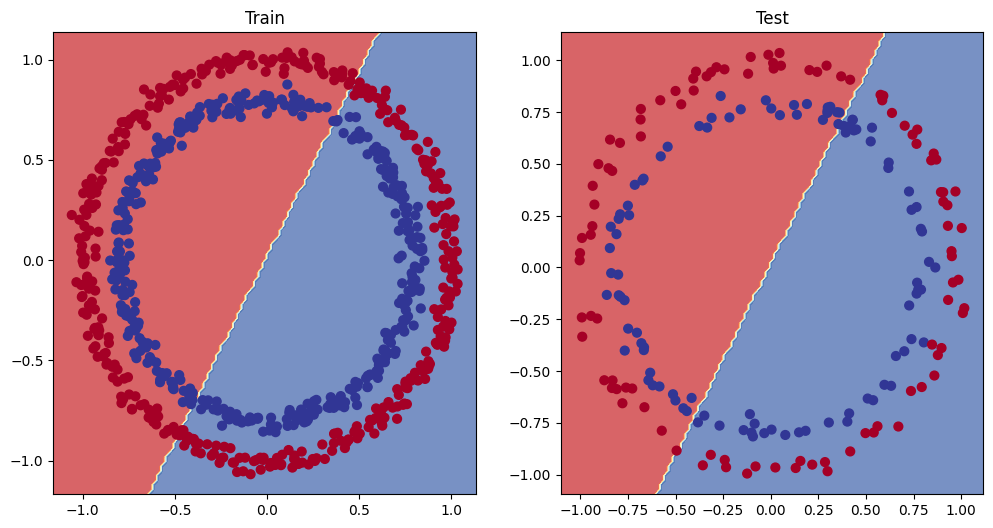

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
# Improving a model
# Add more layer/ hidden units
# Fit for longer
# Change the activation functions/ activation functions/ learning rate

In [31]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Add layer and hidden units
    # Add ReLU to make it non-linearity
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # first layer
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # second layer
    self.layer_3 = nn.Linear(in_features=10, out_features=1) # third layer
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [32]:
model_1 = CircleModelV1()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

In [34]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  model_1.train()
  # Forward
  y_logits = model_1(X_train).squeeze() # output of model
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Loss function
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss backward
  loss.backward()
  # Optimizer step
  optimizer.step()
  model_1.eval()

  # Testing
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc:.2f}% | Test Loss: {test_loss} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.5681842565536499 | Acc: 87.75% | Test Loss: 0.5737816095352173 | Test Acc: 86.50%
Epoch: 100 | Loss: 0.4815295338630676 | Acc: 93.50% | Test Loss: 0.4993472993373871 | Test Acc: 90.50%
Epoch: 200 | Loss: 0.3705616891384125 | Acc: 97.75% | Test Loss: 0.40594878792762756 | Test Acc: 92.00%
Epoch: 300 | Loss: 0.2545759081840515 | Acc: 99.00% | Test Loss: 0.303325355052948 | Test Acc: 96.50%
Epoch: 400 | Loss: 0.17179813981056213 | Acc: 99.50% | Test Loss: 0.22108425199985504 | Test Acc: 97.50%
Epoch: 500 | Loss: 0.12187686562538147 | Acc: 99.62% | Test Loss: 0.16511502861976624 | Test Acc: 99.00%
Epoch: 600 | Loss: 0.09122876822948456 | Acc: 99.88% | Test Loss: 0.12741169333457947 | Test Acc: 99.50%
Epoch: 700 | Loss: 0.07100441306829453 | Acc: 99.88% | Test Loss: 0.1031872108578682 | Test Acc: 99.50%
Epoch: 800 | Loss: 0.05773354694247246 | Acc: 99.88% | Test Loss: 0.08672182261943817 | Test Acc: 99.50%
Epoch: 900 | Loss: 0.04852629080414772 | Acc: 99.88% | Test Loss: 

In [35]:
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

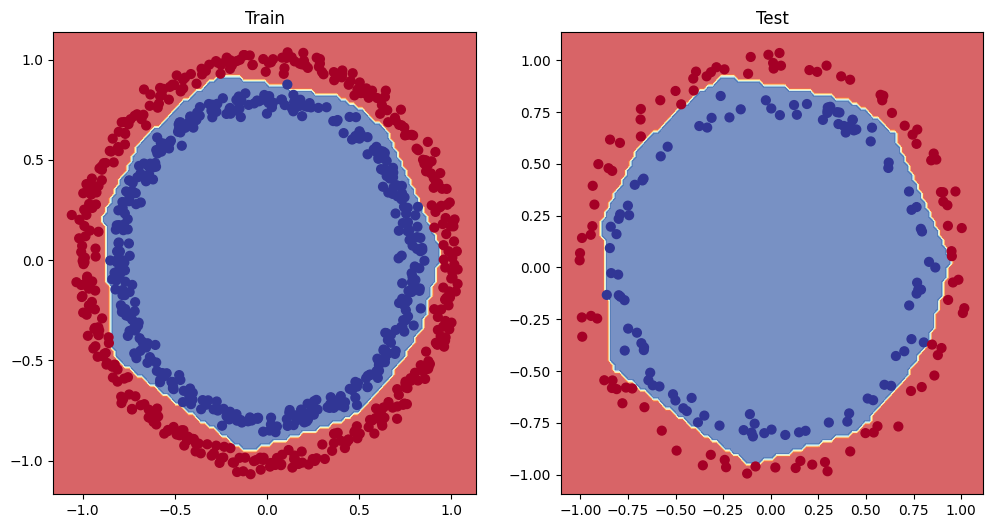

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

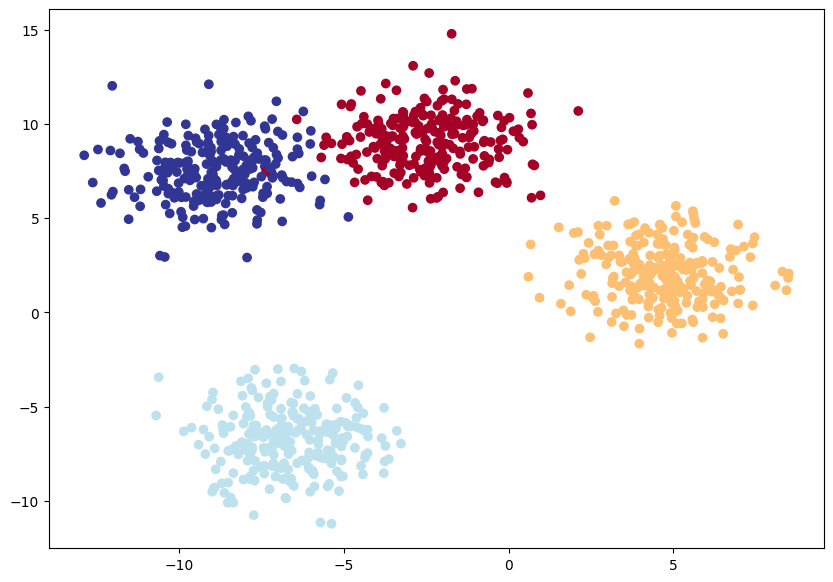

In [33]:
# Multi-class classification
from sklearn.datasets import make_blobs
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
x_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state=42)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


In [35]:
X_blob_train = torch.from_numpy(X_blob_train).type(torch.float)
X_blob_test = torch.from_numpy(X_blob_test).type(torch.float)

In [16]:
class BlobModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    # 3 linear layer
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)
model_4 = BlobModelV0(input_features = NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8)
model_4

BlobModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [17]:
loss_fn = nn.CrossEntropyLoss() # for multi-class # sum of log(p_{i,j}): point i at class j
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr=0.1)

In [29]:
y_logits = model_4(X_blob_train)
y_pred_probs = torch.softmax(y_logits, dim=1) # get output by softmax fn

In [36]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc:.2f}% | Test Loss: {test_loss} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.47447118163108826 | Acc: 98.12% | Test Loss: 0.3772118389606476 | Test Acc: 98.50%
Epoch: 10 | Loss: 0.13198716938495636 | Acc: 99.00% | Test Loss: 0.11776988953351974 | Test Acc: 99.50%
Epoch: 20 | Loss: 0.07869464159011841 | Acc: 99.00% | Test Loss: 0.06909901648759842 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.059378135949373245 | Acc: 99.00% | Test Loss: 0.05057552829384804 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.04975057765841484 | Acc: 99.00% | Test Loss: 0.04110230877995491 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.04407384246587753 | Acc: 99.00% | Test Loss: 0.035407163202762604 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.040365539491176605 | Acc: 99.00% | Test Loss: 0.03161954507231712 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.03777086362242699 | Acc: 99.00% | Test Loss: 0.028921229764819145 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.03586377575993538 | Acc: 99.00% | Test Loss: 0.02690095640718937 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.034409184008836746 | Acc: 99.00% | Test Lo

In [37]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

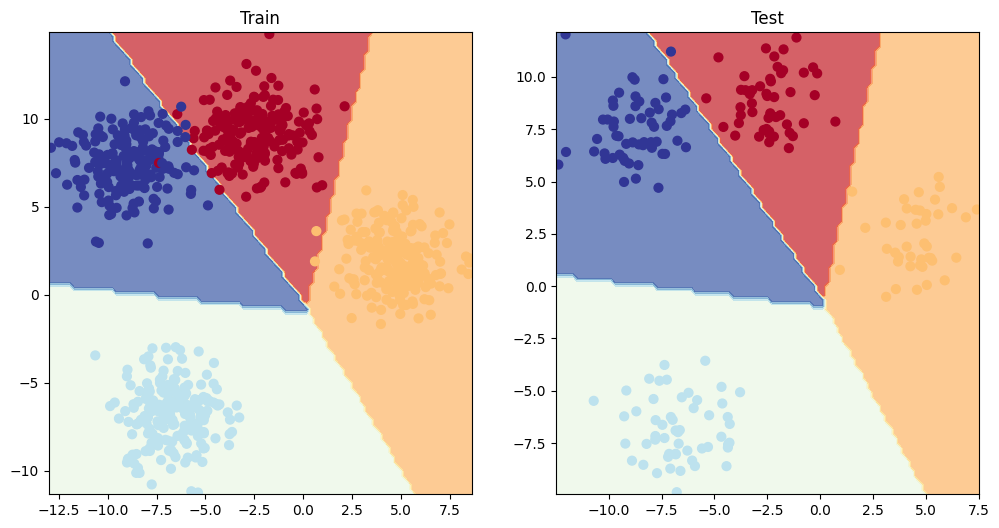

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)